In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# cd "/content/gdrive/My Drive/Colab Notebooks"

In [ ]:
# !pwd

In [ ]:
!pip install face_recognition

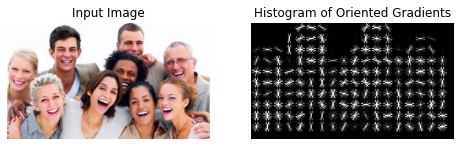

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2
%matplotlib inline

image = cv2.imread('/content/train/people.jpg')
# image = cv2.resize(image, (200, 300))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
feature_desc, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
image.shape

(170, 297, 3)

In [ ]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np

In [ ]:
face_locations = face_recognition.face_locations(image)

face_num = len(face_locations)
print(face_num)


8


Face is located at (213,94) with Width=256 and Height=137
Face is located at (69,30) with Width=105 and Height=66
Face is located at (175,103) with Width=218 and Height=146
Face is located at (122,84) with Width=165 and Height=127
Face is located at (45,98) with Width=88 and Height=142
Face is located at (228,41) with Width=271 and Height=84
Face is located at (153,62) with Width=189 and Height=98
Face is located at (1,62) with Width=37 and Height=98


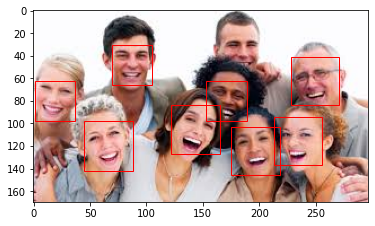

In [ ]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
  top, right, bottom, left = face_location
  x, y, w, h = left, top, right, bottom
  print("Face is located at ({},{}) with Width={} and Height={}".format(x,y,w,h))

  rect = Rectangle((x,y), w-x, h-y, fill=False, color='red')
  ax.add_patch(rect)
plt.show()

In [ ]:
image = cv2.imread('/content/train/Namo.jpg')
namo_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread('/content/train/Shah_Rukh_Khan.jpg')
shah_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread('/content/train/donald.jpg')
donald_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
namo_enc = face_recognition.face_encodings(namo_img)[0]
shah_enc = face_recognition.face_encodings(shah_img)[0]
people_enc  = face_recognition.face_encodings(donald_img)[0]

known_enc = [
             namo_enc,
             shah_enc,
             people_enc
]

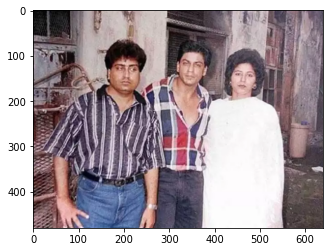

In [ ]:
image = cv2.imread('/content/train/shahrukh.jpg')
test_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)
test_enc = face_recognition.face_encodings(test_img)

In [ ]:
from scipy.spatial import distance

for test in test_enc:
  results = []
  for train in known_enc:
    d = distance.euclidean(train, test)
    results.append(d)
  threshold = 0.6
  results = np.array(results) <= threshold

  name = "Unknown"

  if results[0]:
    name = "Narendra Modi"
  elif results[1]:
    name = "Shahrukh Khan"
  elif results[2]:
    name = "Donald Trump"
print(f"Found {name} in the photo!")
print(results[1])

Found Shahrukh Khan in the photo!
True


In [63]:
#Face Landmarks for features
face_landmaks_list = face_recognition.face_landmarks(donald_img)

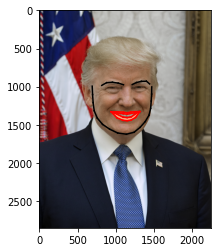

In [73]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(donald_img)
ax = plt.gca()

for face_landmarks in face_landmaks_list:
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x, pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color="black")
    ax.add_line(l)
    pre_x,pre_y = x,y
  
  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x, pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color="black")
    ax.add_line(l)
    pre_x,pre_y = x,y

  top_lip_pts = face_landmarks['top_lip']
  pre_x, pre_y = top_lip_pts[0]
  for (x,y) in top_lip_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color="red")
    ax.add_line(l)
    pre_x,pre_y = x,y
  
  bottom_lip_pts = face_landmarks['bottom_lip']
  pre_x, pre_y = bottom_lip_pts[0]
  for (x,y) in bottom_lip_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color="red")
    ax.add_line(l)
    pre_x,pre_y = x,y

  chin_pts = face_landmarks['chin']
  pre_x, pre_y = chin_pts[0]
  for (x,y) in chin_pts[1:]:
    l = mlines.Line2D([pre_x, x], [pre_y, y], color="black")
    ax.add_line(l)
    pre_x,pre_y = x,y
  
  p = Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)
  p = Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)
  

plt.show()